# Hacettepe University Computer Science and Engineering Department
# 2020-2021 Spring Term BBM409 Course Assignment -1 Report

## Alihan KARATATAR
## 21904324


# Theoritical Part
## 1.a

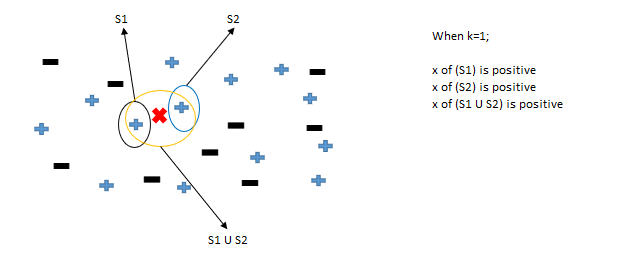

## 1.b

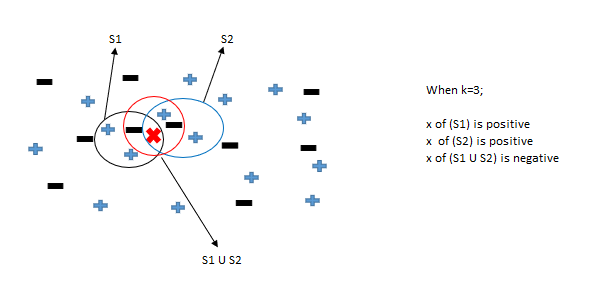

## 2.a
If k value would be 0 a point will become a neigbour itself. So, in this case
it minimizes training error and error would be 0.

## 2.b

If k = 5 or k= 7, this minimizes loocv error. And it is 4/14. Cross validatioın is a better measure of performance because it is trained multiple times and it decreases average errors.

## 2.c

Because of the size of dataset too large and too small k values is not efficient. Our dataset in this example is very small, so giving too large k value causes missclassification and giving too small values of causes overfitting.Yet, small values would have better performance than large values

## 2.d

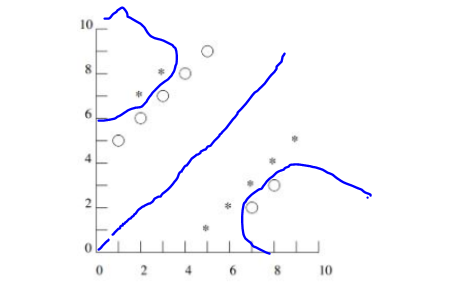

## Linear Regression

### 1

    X is 23x6  (because of the X0 term it is 23x6 not 23x5)
    y is 23x1
    θ is  6x1

### 2

n = 200000 means that we have invert 200001 x 200001 matrix to compute normal equation. This is too slow to compute, so I choose gradient descent

### 3

Feature scaling speeds up gradient descent, so I choose option d.

# Code Part

This report is about my first assignment on BBM409 lecture in Hacettepe University
In this assignment I tried to implement k-nearest neighbour(knn) and weighted
k-nearest neighbour(wknn) algorithm for image classification.

The data set is about Chest X-Ray images. Some of them has Covid-19 virus, some of 
them has viral pneumonia and rests are healthy.

Firstly, I want to show you a little bit of my code for getting you familiar with idea. 
In the code part below, you can see howIi read image from my local folder with using cv2
library. Also, resizing operation has been done here. If you want to change size of images,
you can simply change the relevant numbers. After that  split and assign my data to arrays.

In [ ]:
# assigning relevant data with appropriate arrays
for i in os.listdir(path_covid):
    img = cv2.imread(os.path.join(path_covid, i))
    img = cv2.resize(img, (64, 64))
    label = i.split(" ")[0]
    labels.append(label)
    images.append(img)

Next, image feature extraction part comes. In the code part which can be seen below, I shared
how I use Canny_edge and Gabor filtering algorithm. I am not sharing all code about these filters,
because they had been provided for us. With this part of code you can switch among filters. You can
use only Canny or only Gabor filter. You can use both of them either.

In [ ]:
# Extracting Features
for i in range(len(training)):             #For loop to process all train data
    img = Gabor_process(training[i])       #Gabor process first
    img = Canny_edge(img)                  #Canny_edge filter after that
    filtered_images.append(img)            #appending filtered images in filtered_images array

In next, we are assigned to k-fold cross validation process and you can see related code below.
In the code, by changing n_splits variable you can change how many times does k-folding process 
applied. by changing random_state you can give a starter index for k-fold process and by making
True shuffle option, you can mix the data for prepearing better train/test set.

In [ ]:
kf = KFold(n_splits=5, random_state=None, shuffle=True)         # K-fold process here

X_train, X_test, y_train, y_test = 0, 0, 0, 0
for train_index, test_index in kf.split(filtered_images):       # For loop for splitting train and test data by k-fold process
    X_train, X_test = filtered_images[train_index], filtered_images[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

Finally, we have come best part of project. In below, the knn algorithm can be seen. I have
tried to implement it conceptive. yet, you might have questions. If you think that you do not
understand it or if you want to correct any part of it please do not hesitate to contact me.

Anyway, in here firstly I calculate the euclidean distance among all test and train data, and
assign distances to an array. After that, match distances with labels via zip function and sort 
them in ascending order. By doing this, I can clarify the closest distance and label of this
distance. If I want to display k nearest neighbours, all I need to do is printing array's first
k number of element. like "neighbours[:k]"

In [ ]:
def knn(train, test, labelArr, k):
    prediction = []
    for i in range(len(test)):                     # For loops to get euclidean distance between all train and test sets
        distances = []
        for j in range(len(train)):
            euclidean_dis = np.linalg.norm(train[j] - test[i])
            distances.append(euclidean_dis)
        sorted_labels = []
        for a, b in sorted(zip(distances, labelArr)):       # Sorting labels due to sorted distances
            sorted_labels.append(b)
        prediction.append(knn_Prediction(sorted_labels, k))     # Prediction array appends with predicted data
        np.array(prediction)

    acc = get_AccuracyKnn(prediction, y_test)               # Accruacy function returns mean accuracy

    return acc

In function below, how I can predict data can be seen. This function returns arrays most repeated
value. For example we have sorted_label array whic includes ["covid", "normal","covid", "covid", "pneumonia"],
then it returns covid as most repeated value. and, this value appending prediction array above

In [ ]:
def knn_Prediction(sortedArr, k):                          # This function returns most repeated value of array
    return Counter(np.array(sortedArr[:k])).most_common(1)[0][0]

Next task is implementing wknn. Same as the knn I start from the finding euclidean distances between
train and test sets. After that, we expand our prediction array with predicted data which comes next.
You can see related code below

In [ ]:
# Weighted k-nearest neighbour algorithm

def wknn(train, test, labelArr, k):
    predictionArr = []
    for i in range(len(test)):              # For loops to get euclidean distance between all train and test sets
        distances = []
        for j in range(len(train)):
            euclidean_dis = np.linalg.norm(train[j] - test[i])
            distances.append(euclidean_dis)
        sorted_labels = []
        for dist, labelVar in sorted(zip(distances, labelArr)):         # Sorting labels due to sorted distances
            sorted_labels.append(labelVar)
        distances = sorted(distances)

        predictionArr.append(wknn_Prediction(sorted_labels, distances, k)) # Prediction array appends with predicted data

    np.array(predictionArr)
    acc = get_AccuracyKnn(predictionArr, y_test)            # Accruacy function returns mean accuracy

    return acc

In prediction part, wknn differs from knn in terms of calculating predicted label. In knn we return most 
repeated value of sorted array. But in wknn first we calculate the frequency of each label separately.
To do this, again we calculate distance but for this time we need to get frequency of each label. In below,
you can see a loop for this. Every time we increase frequency, we inverse it's distance and sum them up.
Later, I compare this frequencies and choose the biggest one. It would be our label.

In [ ]:
# wknn Prediction function

def wknn_Prediction(sorted_labels, distances, k):
    for p in range(k):                                  # For loop to find frequency
        freq_cov, freq_pneu, freq_norm = 0, 0, 0
        if sorted_labels[p] == "COVID":
            if distances[p] != 0:                       # If distance zero, ignore it
                freq_cov += 1 / distances[p]

        elif sorted_labels[p] == "Viral":
            if distances[p] != 0:
                freq_pneu += 1 / distances[p]

        elif sorted_labels[p] == "NORMAL":
            if distances[p] != 0:
                freq_norm += 1 / distances[p]

    if max(freq_cov, freq_norm, freq_pneu) == freq_cov:         # Find maximum frequency to get label
        prediction = "COVID"
    elif max(freq_cov, freq_norm, freq_pneu) == freq_pneu:
        prediction = "Viral"
    elif max(freq_cov, freq_norm, freq_pneu) == freq_norm:
        prediction = "NORMAL"
    else:
        prediction = sorted_labels[0]

    return prediction

In above, as you can see we have accuracy for both knn and wknn. I wrote a function that calculate
accuray for both of them. Simply it takes predicted array and compares it with the test case. It 
returns a percentage value of correct matches

In [ ]:
# Accuracy calculation function

def get_AccuracyKnn(predicted, test):
    correct, total = 0, 0
    acc = []
    for i in range(np.size(predicted)):
        if test[i] == predicted[i]:
            correct = correct + 1
        total = total + 1
        acc.append((correct / total) * 100)

    return round(sum(acc) / len(acc))

## Comments About Results

Finally, we have finished code part. We are ready to run the code and see the results. I have tried
my code for various scenarios. You will find the result of it upcoming part. Firstly, I want to examine
how sample size changes accuracy. As you can see in graph, when sample size grows accuracy grows also.
That is because in a larger sample size learning works better. I wish I could try with larger sample
size, like thousands, but I have limited resources like RAM capacity, CPU clock rate and time

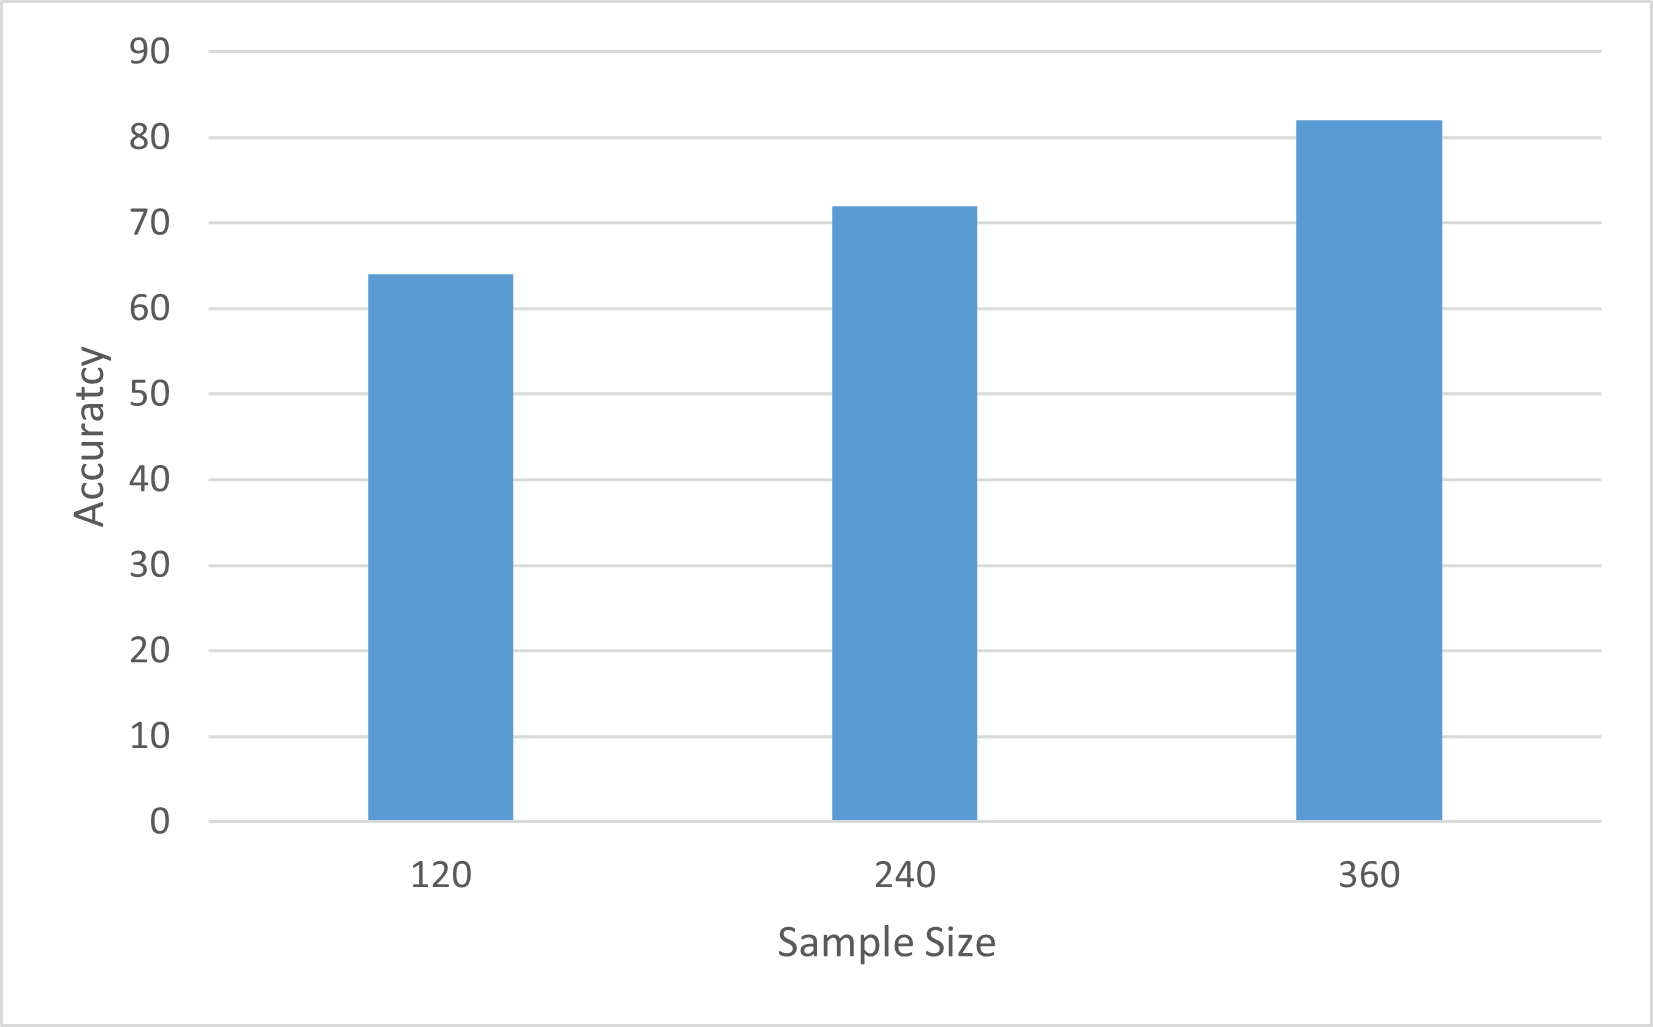

In our next graph, we will see how accuracy changes due to increasing k value in knn. It can be clearly seen
that when k value works relatable between 4 and 8. But, after that accuracy decreases rapidly. It reaches its'
maximum value when k is 6.

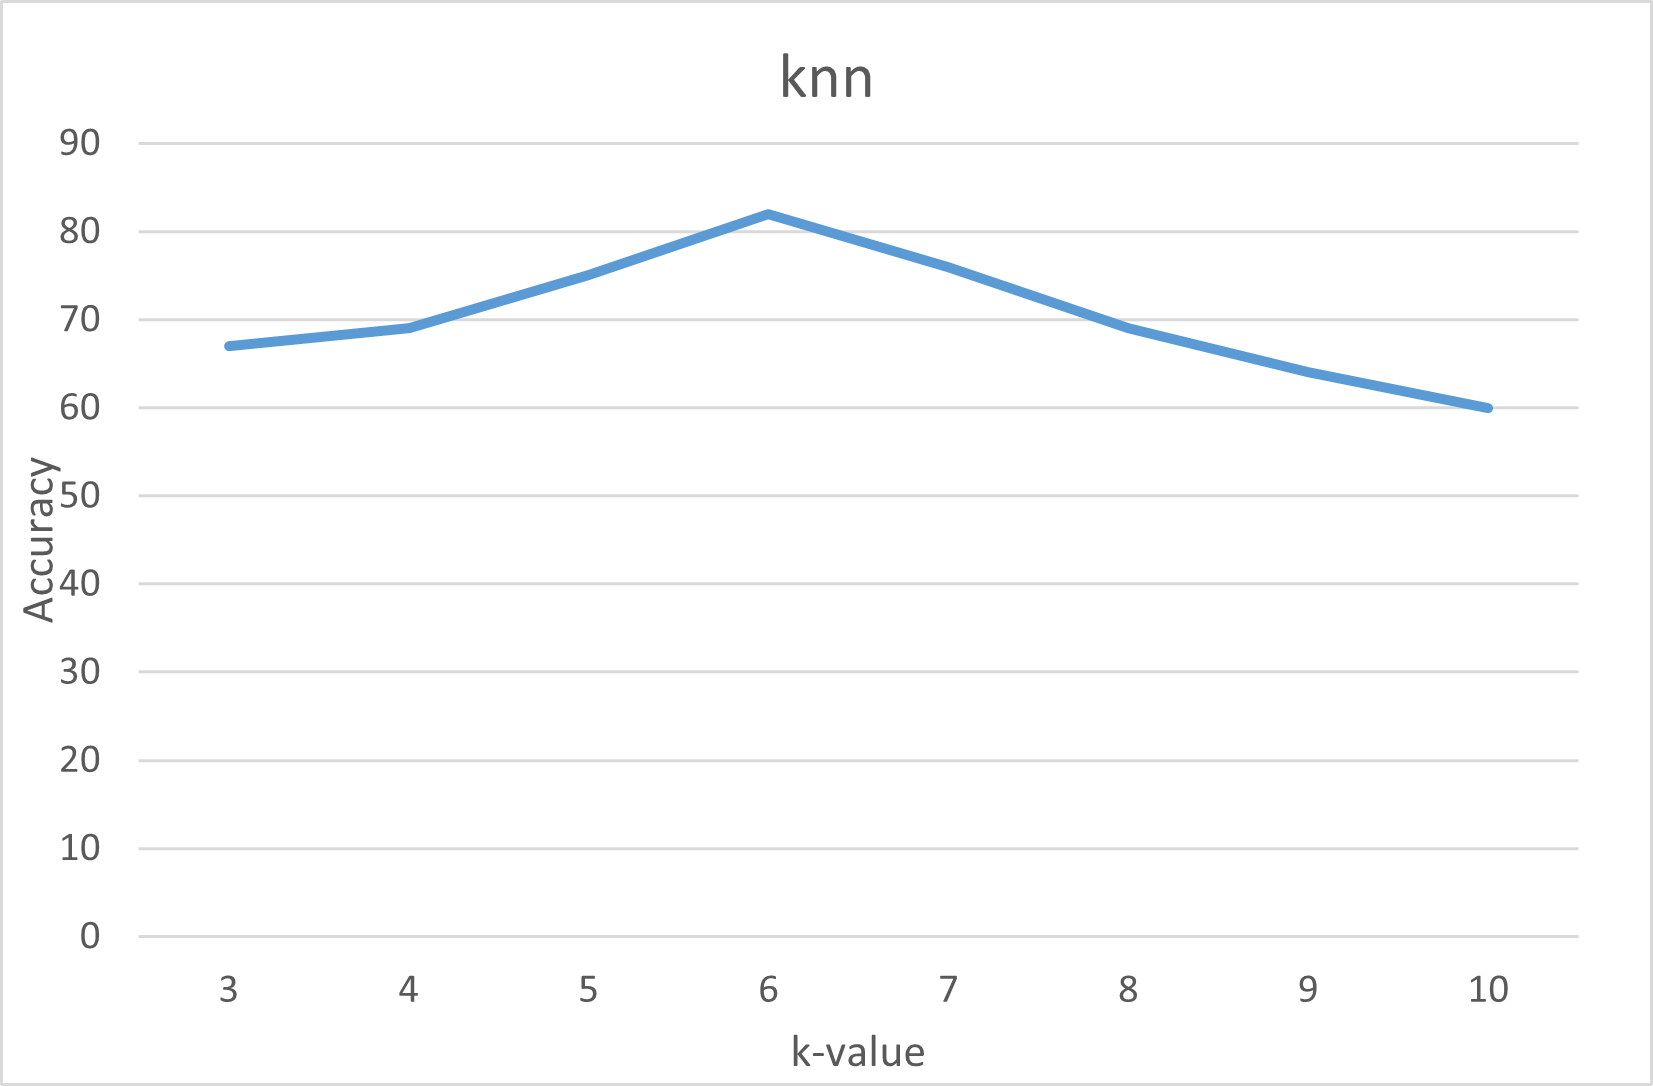

Now let see the same graph for wknn. This one also works relatable in same distrinct of k. But again, after
k value exceeds 8, accuracy starts to decrease. This time accuracy reach its' maximum at k = 5. These two
comparisons were applied under same circumstances, like sample size, applied filters and data split size.

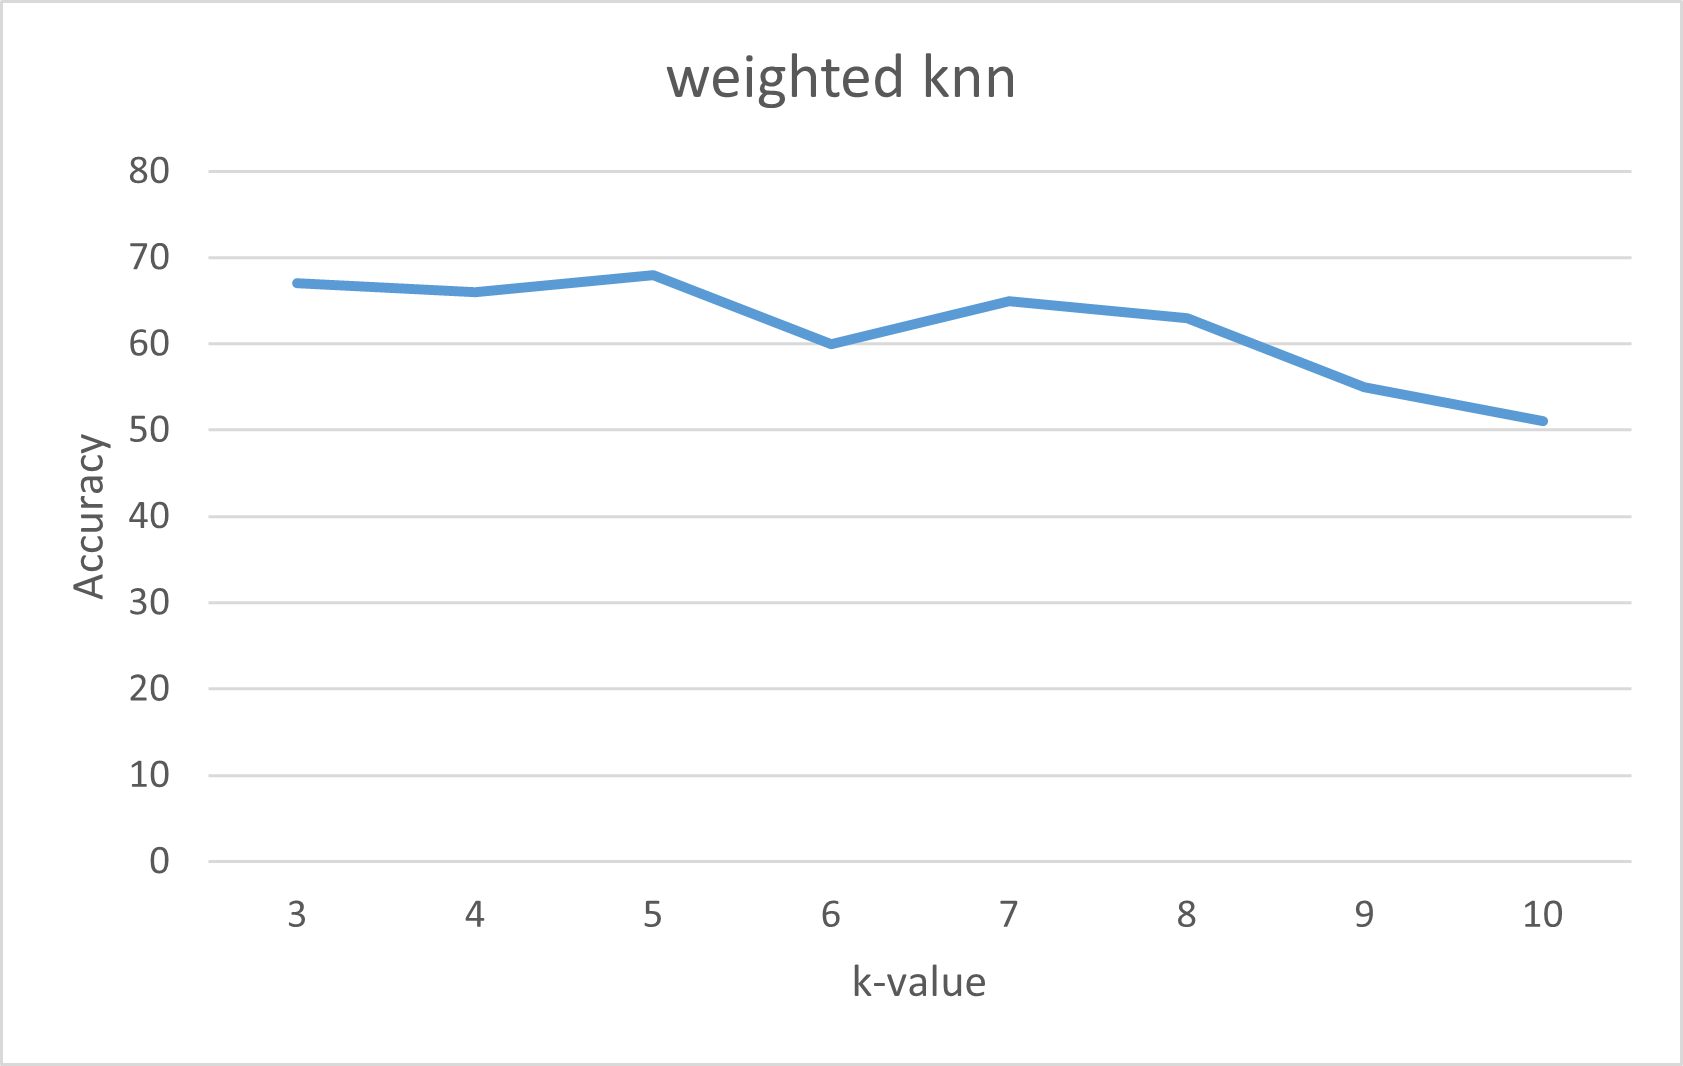

Now, Let's go to our next graph which is about k-fold cross validation split size. In below, both knn and wknn
results can be seen. If we look at the graph, when split size becomes 7 and 8, we can observe that accuracy is
higher than mean for both of them. Besides, its' accuracy rates are so close to each other.

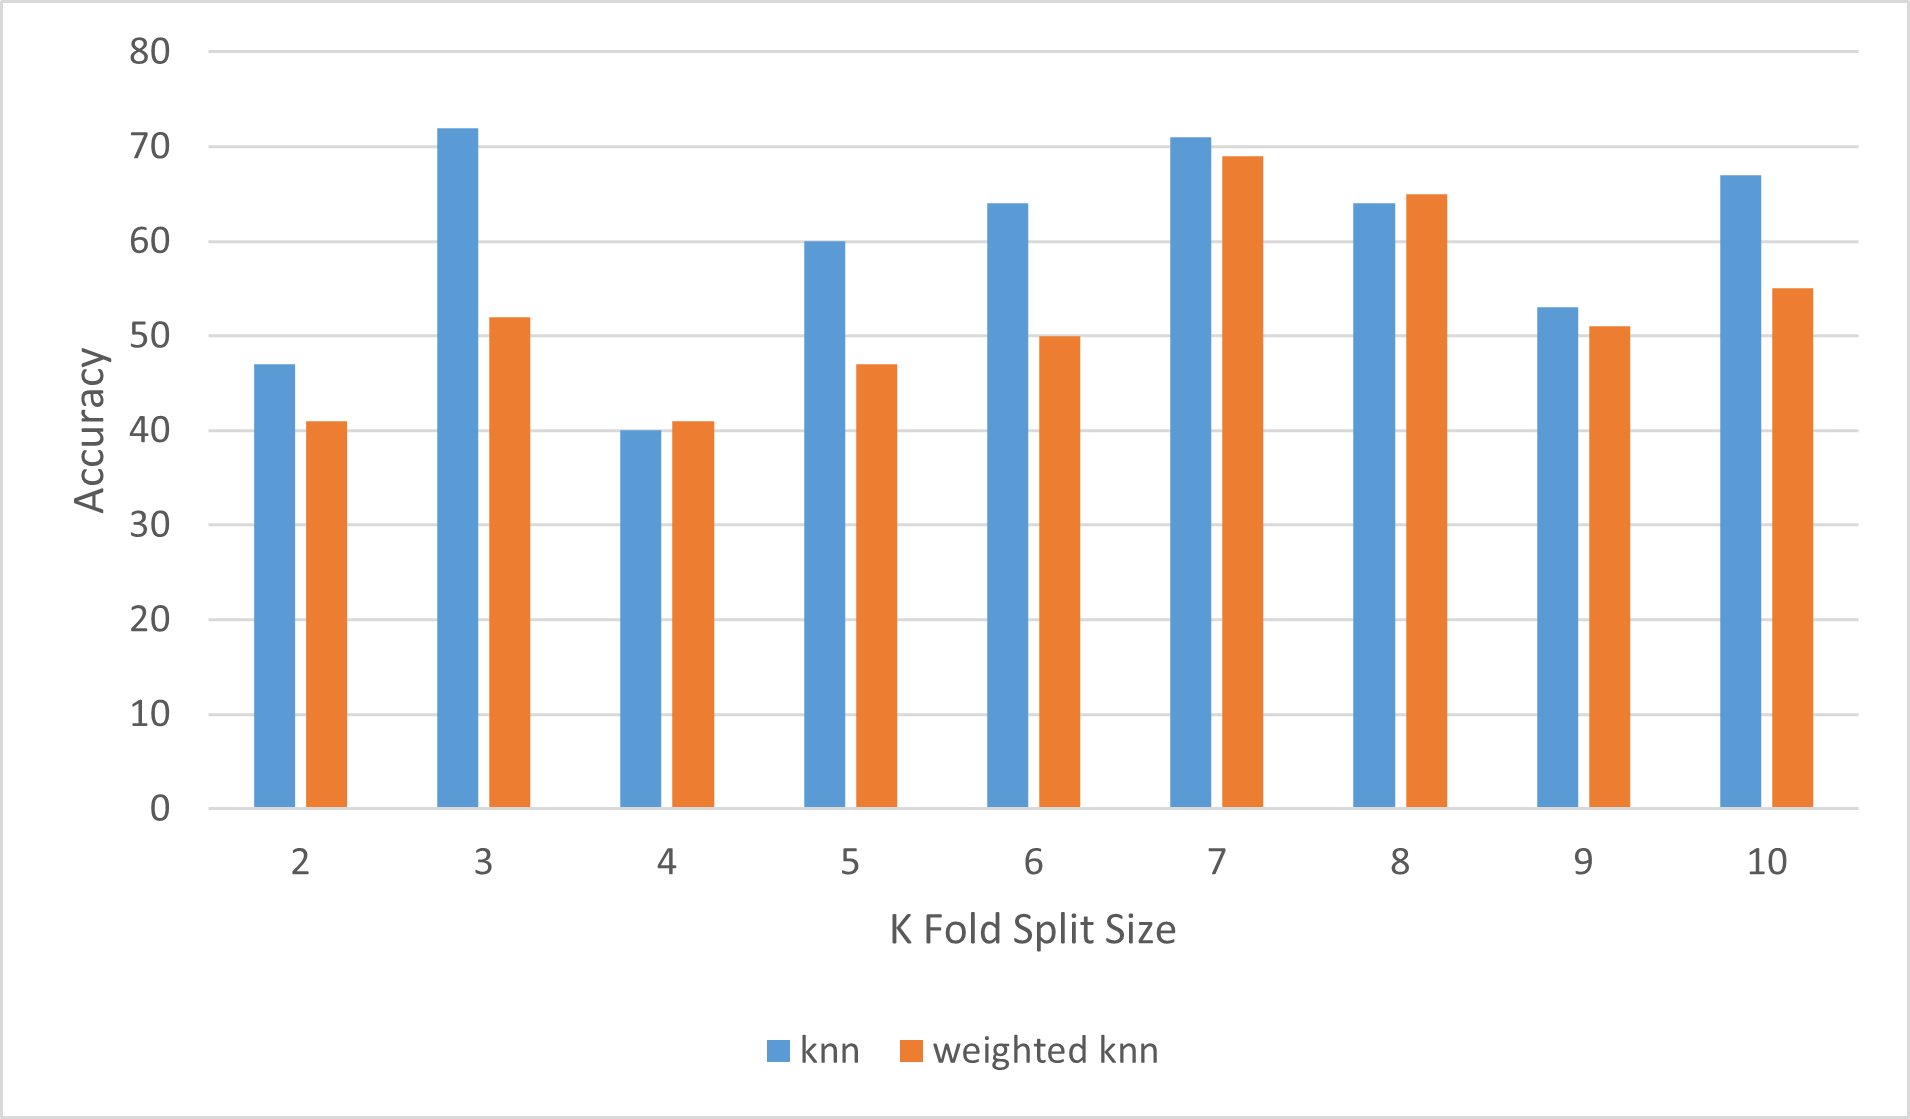

Next graph is about size of images. I applied this under same circumstances except image size,then visualized it.
In result, it can be seen that 32*32 image size has better accuracy. I am not sure but if I could applied more 
filter on images higher resolutions might have better accuracy performance

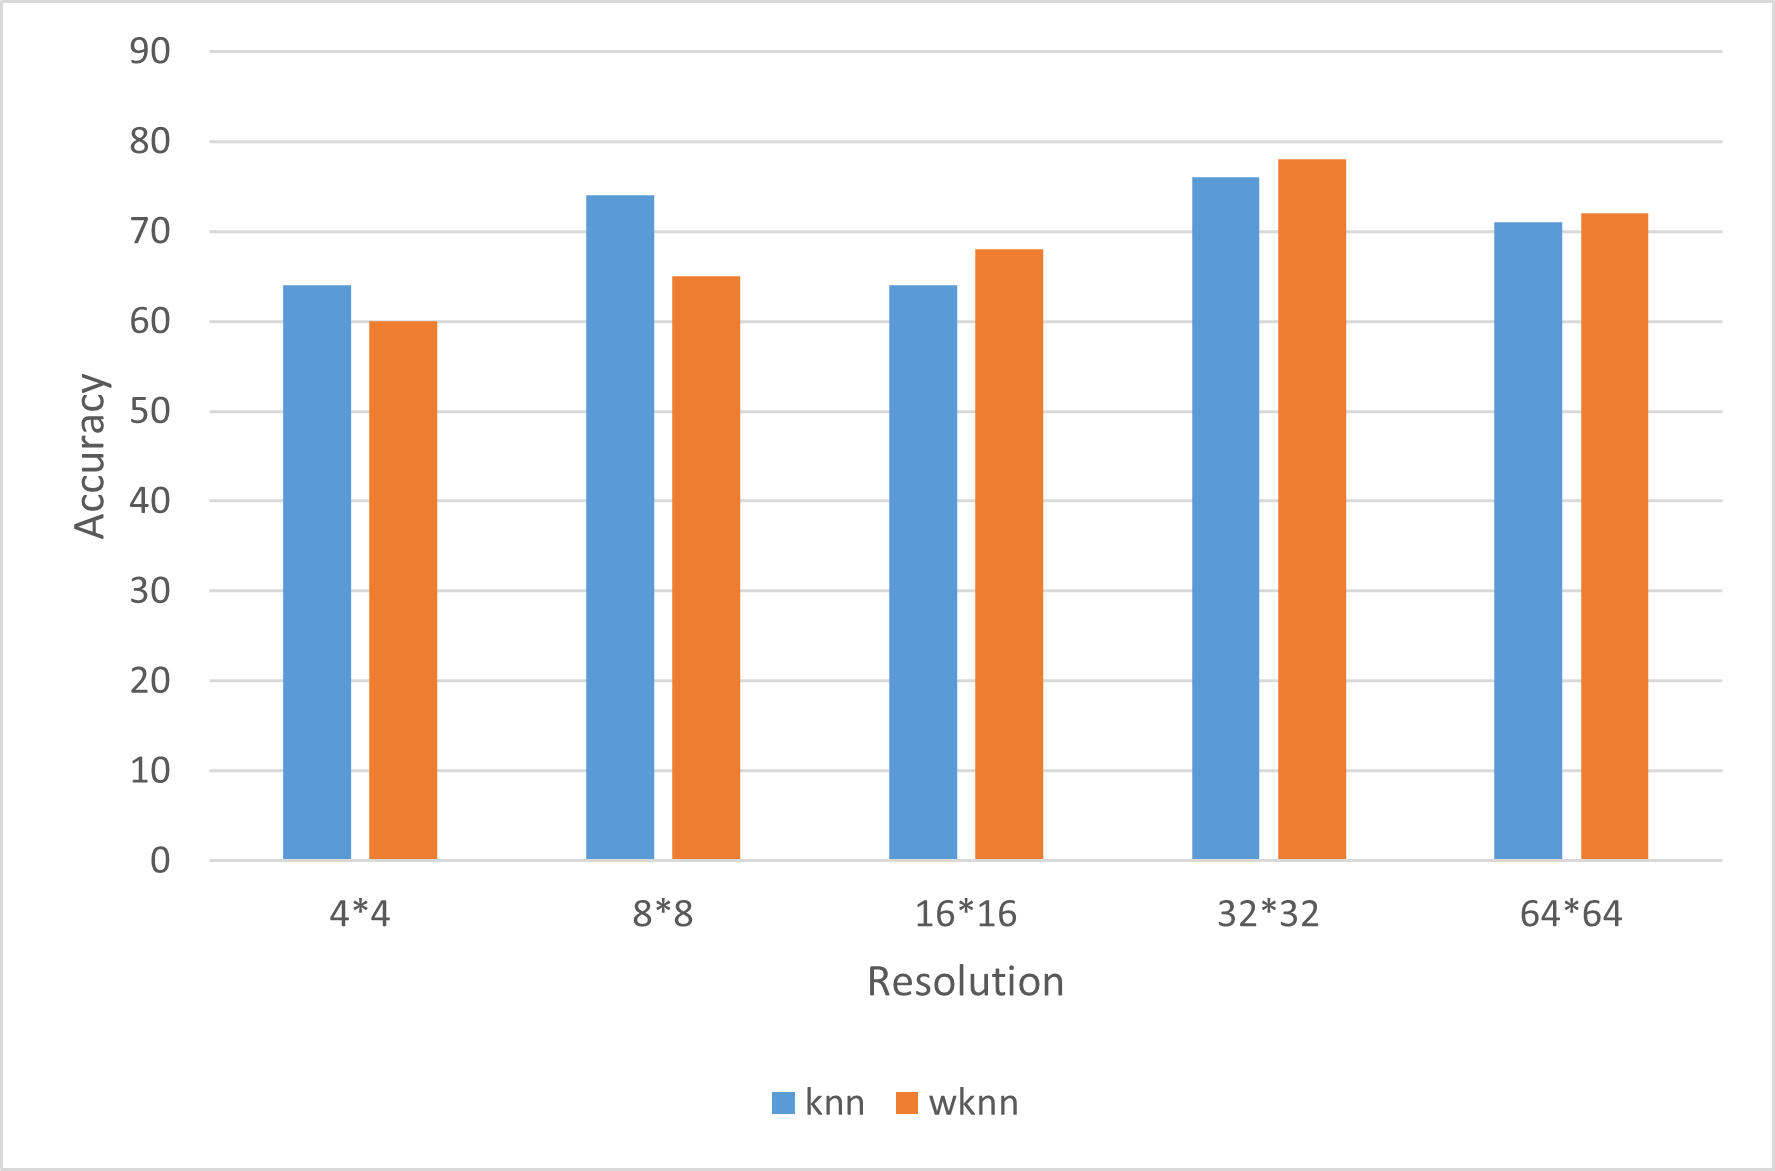

## Example Of Misclassification

Of course there are some errors and misclassifications of my program. One of this result is shared below.
On left side we have COVID (91) and right side Viral Pneumonia (33), both of them can be seen in train
dataset. My program take Viral Pneumonia (33) as train data and try to predict COVID (91). But, in result
it predicted as Viral Pneumonia, and that is wrong.

Anything about my program can cause that situation. For example sample size, if I could use bigger train data
it might be classified correctly, or if I could add additional filter on images my program would learn better.
Even k value might has effect on this. If I took smaller value of k, maybe it classified as Covid, and it is trus.

If you want to see more misclassification examples, you can run my program in debug mode. Then compare predict and
test arrays. You can identify whether which images classified wrong or not.

In below you can see the images I have mentioned above. Even with the naked eye, it seems very difficult to misclassify these two images.

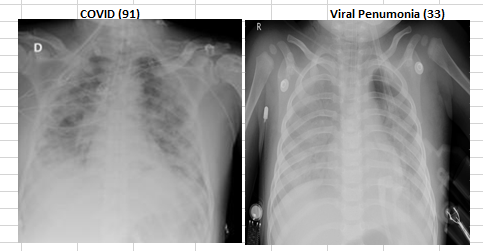